<a href="https://colab.research.google.com/github/ZwwWayne/mmocr/blob/update-colab/demo/MMOCR_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MMOCR Tutorial

Welcome to MMOCR! This is the official colab tutorial for using MMOCR. In this tutorial, you will learn how to

- Perform testing with a pretrained text recognizer.
- Perform testing with a pretrained Key Information Extraction (KIE) model.
- Perform testing with a pretrained text detector
- Train a text recognizer with a toy dataset.

Let's start!

## Install MMOCR

When installing dependencies for mmocr, please ensure that all the dependency versions are compatible with each other. For instance, if CUDA 10.1 is installed, then the Pytorch version must be compatible with cu10.1. Please see [getting_started.md](docs/getting_started.md) for more details. 

In [5]:
%cd ..

/home/SENSETIME/lintsuihin/code/mmocr-1


### Check NVCC and GCC compiler version

In [1]:
!nvcc -V
!gcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243
gcc (Ubuntu 6.5.0-2ubuntu1~16.04) 6.5.0 20181026
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



### Install Dependencies 

In [6]:
# Install torch dependencies: (use cu101 since colab has CUDA 10.1)
!pip install -U torch==1.5.0+cu101 torchvision==0.6.0+cu101 -f https://download.pytorch.org/whl/torch_stable.html

# Install mmcv-full thus we could use CUDA operators
!pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu101/torch1.5.0/index.html

# Install mmdetection
!pip install mmdet==2.11.0

# Install mmocr
!git clone https://github.com/open-mmlab/mmocr.git
!pip install -r requirements.txt
!pip install -v -e .

# install Pillow 7.0.0 back in order to avoid bug in colab
!pip install Pillow==7.0.0

irement already satisfied: addict in /home/SENSETIME/lintsuihin/anaconda3/lib/python3.8/site-packages (from mmcv-full) (2.4.0)
fatal: destination path 'mmocr' already exists and is not an empty directory.
Using pip 20.2.4 from /home/SENSETIME/lintsuihin/anaconda3/lib/python3.8/site-packages/pip (python 3.8)
Non-user install because site-packages writeable
Created temporary directory: /tmp/pip-ephem-wheel-cache-it9h88fb
Created temporary directory: /tmp/pip-req-tracker-08_a9ef2
Initialized build tracking at /tmp/pip-req-tracker-08_a9ef2
Created build tracker: /tmp/pip-req-tracker-08_a9ef2
Entered build tracker: /tmp/pip-req-tracker-08_a9ef2
Created temporary directory: /tmp/pip-install-fkw968jx
Obtaining file:///home/SENSETIME/lintsuihin/code/mmocr-1
  Added file:///home/SENSETIME/lintsuihin/code/mmocr-1 to build tracker '/tmp/pip-req-tracker-08_a9ef2'
    Running setup.py (path:/home/SENSETIME/lintsuihin/code/mmocr-1/setup.py) egg_info for package from file:///home/SENSETIME/lintsuihin

### Check Installed Dependencies Versions

In [7]:
# Check Pytorch installation
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

# Check MMDetection installation
import mmdet
print(mmdet.__version__)

# Check mmcv installation
import mmcv
from mmcv.ops import get_compiling_cuda_version, get_compiler_version
print(mmcv.__version__)
print(get_compiling_cuda_version())
print(get_compiler_version())

# Check mmocr installation
import mmocr
print(mmocr.__version__)

1.5.0+cu101 True
2.11.0
1.3.4
10.1
GCC 7.3
0.1.0


## Perform Testing with a Pretrained Text Recognizer 

We now demonstrate how to perform testing on a [demo text recognition image](demo/demo_text_recog.jpg) with a pretrained text recognizer. SAR text recognizer is used for this demo, whose checkpoint can be downloaded from the [official documentation](https://mmocr.readthedocs.io/en/latest/textrecog_models.html#show-attend-and-read-a-simple-and-strong-baseline-for-irregular-text-recognition). We visualize the predicted result in the end. 

In [4]:
!python demo/image_demo.py demo/demo_text_recog.jpg configs/textrecog/sar/sar_r31_parallel_decoder_academic.py https://download.openmmlab.com/mmocr/textrecog/sar/sar_r31_parallel_decoder_academic-dba3a4a3.pth outputs/demo_text_recog_pred.jpg

Use load_from_http loader
/home/SENSETIME/lintsuihin/anaconda3/lib/python3.8/site-packages/mmdet/apis/inference.py:47: UserWarning: Class names are not saved in the checkpoint's meta data, use COCO classes by default.
  warnings.warn('Class names are not saved in the checkpoint\'s '
result: {'text': 'STAR', 'score': 0.9664110988378525}


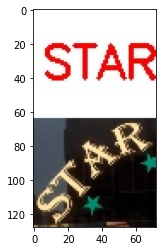

In [5]:
# Visualize the results
import matplotlib.pyplot as plt
predicted_img = mmcv.imread('./outputs/demo_text_recog_pred.jpg')
plt.imshow(mmcv.bgr2rgb(predicted_img))
plt.show()

## Perform Testing with a Pretrained Text Detector 

Next, we perform testing with a pretrained PANet text detector and visualize the bounding box results for the demo text detection image provided in [demo_text_det.jpg](.github/demo/demo_text_det.jpg). The PANet checkpoint can be downloaded from the [official documentation](https://mmocr.readthedocs.io/en/latest/textdet_models.html#efficient-and-accurate-arbitrary-shaped-text-detection-with-pixel-aggregation-network).

In [6]:
!python demo/image_demo.py demo/demo_text_det.jpg configs/textdet/panet/panet_r18_fpem_ffm_600e_icdar2015.py https://download.openmmlab.com/mmocr/textdet/panet/panet_r18_fpem_ffm_sbn_600e_icdar2015_20210219-42dbe46a.pth outputs/demo_text_det_pred.jpg

Use load_from_http loader
result: {'boundary_result': [[814.189567565918, 0.0, 904.2201447486877, 0.0, 904.2201447486877, 39.13043260574341, 814.189567565918, 39.13043260574341, 0.9057406783103943], [90.03057718276978, 46.95651912689209, 125.25993347167969, 46.95651912689209, 125.25993347167969, 70.43477869033813, 90.03057718276978, 70.43477869033813, 0.9709924459457397], [487.5236017727184, 85.64961081325555, 489.66499120697335, 57.820967069855215, 549.8311834401829, 62.44756185349934, 547.689794005928, 90.27620559689967, 0.9715930223464966], [364.0366816520691, 86.0869517326355, 395.351665019989, 86.0869517326355, 395.351665019989, 105.6521680355072, 364.0366816520691, 105.6521680355072, 0.9470174908638], [788.5383478123913, 153.76874482916082, 792.2102226550851, 98.70912997889491, 913.0188231752618, 106.76030933393577, 909.346948332568, 161.81991672066397, 0.9761190414428711], [913.193170931554, 163.02339724984085, 919.9379623092682, 109.08360413452465, 1040.3801876540092, 124.13376

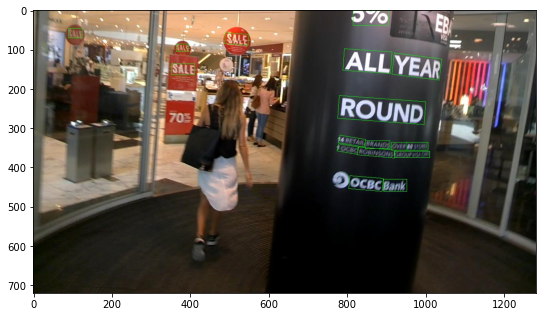

In [7]:
# Visualize the results
import matplotlib.pyplot as plt
predicted_img = mmcv.imread('./outputs/demo_text_det_pred.jpg')
plt.figure(figsize=(9, 16))
plt.imshow(mmcv.bgr2rgb(predicted_img))
plt.show()

## Perform Testing with a Pretrained KIE Model

We perform testing on the WildReceipt dataset for KIE model by first downloading the .tar file from [Datasets Preparation](https://mmocr.readthedocs.io/en/latest/datasets.html) in MMOCR documentation and then extract the dataset. We have chosen the Visual + Textual moduality test dataset, which we evaluate with Macro F1 metrics.

In [11]:
# First download the KIE dataset .tar file and extract it to ./data
!mkdir data
!wget https://download.openmmlab.com/mmocr/data/wildreceipt.tar
!tar -xf wildreceipt.tar 
!mv wildreceipt ./data

--2021-05-17 11:39:10--  https://download.openmmlab.com/mmocr/data/wildreceipt.tar
Resolving download.openmmlab.com (download.openmmlab.com)... 47.75.20.25
Connecting to download.openmmlab.com (download.openmmlab.com)|47.75.20.25|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 185323520 (177M) [application/x-tar]
Saving to: ‘wildreceipt.tar.3’

wildreceipt.tar.3   100%[===================>] 176.74M  17.7MB/s    in 10s     

2021-05-17 11:39:21 (17.1 MB/s) - ‘wildreceipt.tar.3’ saved [185323520/185323520]



In [12]:
# Test the dataset with macro f1 metrics 
!python tools/test.py configs/kie/sdmgr/sdmgr_unet16_60e_wildreceipt.py https://download.openmmlab.com/mmocr/kie/sdmgr/sdmgr_unet16_60e_wildreceipt_20210405-16a47642.pth --eval macro_f1

Use load_from_http loader
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 472/472, 21.3 task/s, elapsed: 22s, ETA:     0s{'macro_f1': 0.87641114}


## Perform Training on a Toy Dataset with MMOCR Recognizer
We now demonstrate how to perform training with an MMOCR recognizer. Since training a full academic dataset is time consuming (usually takes about several hours), we will train on the toy dataset for the SAR text recognition model and visualize the predictions. Text detection and other downstream tasks such as KIE follow similar procedures.

Training a dataset usually consists of the following steps:
1. Convert the dataset into a format supported by MMOCR (e.g. COCO for text detection). The annotation file can be in either .txt or .lmdb format, depending on the size of the dataset. This step is usually applicable to customized datasets, since the datasets and annotation files we provide are already in supported formats. 
2. Modify the config for training. 
3. Train the model. 

The toy dataset consisits of ten images as well as annotation files in both txt and lmdb format, which can be found in [ocr_toy_dataset](.github/tests/data/ocr_toy_dataset). 

### Visualize the Toy Dataset

We first get a sense of what the toy dataset looks like by visualizing one of the images and labels. 

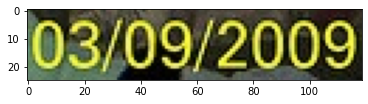

In [13]:
import mmcv
import matplotlib.pyplot as plt 

img = mmcv.imread('./tests/data/ocr_toy_dataset/imgs/1036169.jpg')
plt.imshow(mmcv.bgr2rgb(img))
plt.show()

In [14]:
# Inspect the labels of the annootation file
!cat tests/data/ocr_toy_dataset/label.txt

1223731.jpg GRAND
1223733.jpg HOTEL
1223732.jpg HOTEL
1223729.jpg PACIFIC
1036169.jpg 03/09/2009
1190237.jpg ANING
1058891.jpg Virgin
1058892.jpg america
1240078.jpg ATTACK
1210236.jpg DAVIDSON


### Modify the Configuration File

In order to perform inference for SAR on colab, we need to modify the config file to accommodate some of the settings of colab such as the number of GPU available. 

In [8]:
from mmcv import Config
cfg = Config.fromfile('./configs/textrecog/sar/sar_r31_parallel_decoder_toy_dataset.py')

In [9]:
from mmdet.apis import set_random_seed

# Set up working dir to save files and logs.
cfg.work_dir = './demo/tutorial_exps'

# The original learning rate (LR) is set for 8-GPU training.
# We divide it by 8 since we only use one GPU.
cfg.optimizer.lr = 0.001 / 8
cfg.lr_config.warmup = None
# Choose to log training results every 40 images to reduce the size of log file. 
cfg.log_config.interval = 40

# Set seed thus the results are more reproducible
cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.gpu_ids = range(1)

# We can initialize the logger for training and have a look
# at the final config used for training
print(f'Config:\n{cfg.pretty_text}')

Config:
checkpoint_config = dict(interval=1)
log_config = dict(interval=40, hooks=[dict(type='TextLoggerHook')])
dist_params = dict(backend='nccl')
log_level = 'INFO'
load_from = None
resume_from = None
workflow = [('train', 1)]
label_convertor = dict(
    type='AttnConvertor', dict_type='DICT90', with_unknown=True)
model = dict(
    type='SARNet',
    backbone=dict(type='ResNet31OCR'),
    encoder=dict(
        type='SAREncoder', enc_bi_rnn=False, enc_do_rnn=0.1, enc_gru=False),
    decoder=dict(
        type='ParallelSARDecoder',
        enc_bi_rnn=False,
        dec_bi_rnn=False,
        dec_do_rnn=0,
        dec_gru=False,
        pred_dropout=0.1,
        d_k=512,
        pred_concat=True),
    loss=dict(type='SARLoss'),
    label_convertor=dict(
        type='AttnConvertor', dict_type='DICT90', with_unknown=True),
    max_seq_len=30)
optimizer = dict(type='Adam', lr=0.000125)
optimizer_config = dict(grad_clip=None)
lr_config = dict(policy='step', step=[3, 4], warmup=None)
total_e

### Train the SAR Text Recognizer 
Finally, we train the SAR text recognizer on the toy dataset for five epochs. 

In [10]:
from mmocr.datasets import build_dataset
from mmocr.models import build_detector
from mmocr.apis import train_detector
import os.path as osp

# Build dataset
datasets = [build_dataset(cfg.data.train)]

# Build the detector
model = build_detector(
    cfg.model, train_cfg=cfg.get('train_cfg'), test_cfg=cfg.get('test_cfg'))
# Add an attribute for visualization convenience
model.CLASSES = datasets[0].CLASSES

# Create work_dir
mmcv.mkdir_or_exist(osp.abspath(cfg.work_dir))
train_detector(model, datasets, cfg, distributed=False, validate=True)

2021-05-17 18:46:09,650 - mmocr - INFO - Start running, host: SENSETIME\lintsuihin@hk0014000720l, work_dir: /home/SENSETIME/lintsuihin/code/mmocr-1/demo/tutorial_exps
2021-05-17 18:46:09,651 - mmocr - INFO - workflow: [('train', 1)], max: 5 epochs
2021-05-17 18:46:18,432 - mmocr - INFO - Epoch [1][40/125]	lr: 1.250e-04, eta: 0:02:08, time: 0.219, data_time: 0.054, memory: 2685, loss_ce: 2.8200, loss: 2.8200
2021-05-17 18:46:25,064 - mmocr - INFO - Epoch [1][80/125]	lr: 1.250e-04, eta: 0:01:44, time: 0.166, data_time: 0.002, memory: 2685, loss_ce: 1.3645, loss: 1.3645
2021-05-17 18:46:31,678 - mmocr - INFO - Epoch [1][120/125]	lr: 1.250e-04, eta: 0:01:32, time: 0.165, data_time: 0.002, memory: 2685, loss_ce: 0.8124, loss: 0.8124
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 10/10, 8.4 task/s, elapsed: 1s, ETA:     0s2021-05-17 18:46:33,755 - mmocr - INFO - 
Evaluateing tests/data/ocr_toy_dataset/label.lmdb with 10 images now
2021-05-17 18:46:33,758 - mmocr - INFO - Saving checkpoint at 1 epochs
2

### Test and Visualize the Predictions

For completeness, we also perform testing on the latest checkpoint and evaluate the results with hmean-iou metrics. The predictions are saved in the ./outputs file. 

In [11]:
from mmocr.apis.inference import model_inference
from mmdet.apis import init_detector

img = './tests/data/ocr_toy_dataset/imgs/1036169.jpg'
checkpoint = "./demo/tutorial_exps/epoch_5.pth"
out_file = 'outputs/1036169.jpg'

model = init_detector(cfg, checkpoint, device="cuda:0")
if model.cfg.data.test['type'] == 'ConcatDataset':
    model.cfg.data.test.pipeline = model.cfg.data.test['datasets'][0].pipeline


result = model_inference(model, img)
print(f'result: {result}')

img = model.show_result(
        img, result, out_file=out_file, show=False)

mmcv.imwrite(img, out_file)

Use load_from_local loader
result: {'text': '03/09/2009', 'score': 0.9964864671230316}


True

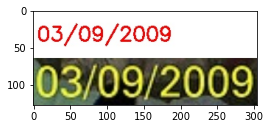

In [30]:
# Visualize the results
predicted_img = mmcv.imread('./outputs/1036169.jpg')
plt.figure(figsize=(4, 4))
plt.imshow(mmcv.bgr2rgb(predicted_img))
plt.show()